In [1]:
import sys
import os

# 1. Lấy đường dẫn tuyệt đối của thư mục hiện tại (notebooks)
current_dir = os.getcwd()

# 2. Lấy đường dẫn của thư mục cha (MODELS)
project_root = os.path.dirname(current_dir)

# 3. Thêm thư mục cha vào hệ thống tìm kiếm module của Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã thêm đúng chưa (Optional)
print(f"Project Root added: {project_root}")

from models.utils.loader import *
from models.utils.visualize import *
from models.metrics import *
from models.softmax_regression import *
from models.model_pixel import PixelSoftmax
from models.model_edge import EdgeSoftmax
from models.model_pca import PCASoftmax
from models.model_block import BlockSoftmax
from models.model_hog import HOGSoftmax
from models.softmax_regression import SoftmaxRegression

Project Root added: d:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS


Output()

(54000, 1) (54000, 784)


(6000, 1) (6000, 784)

Epoch 1/1 - Validation Accuracy: 87.50%

(10000, 1) (10000, 784)
Accuracy: 0.8749


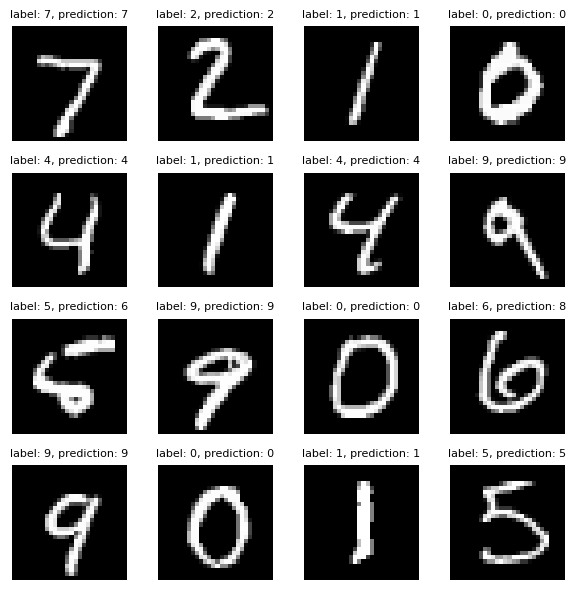

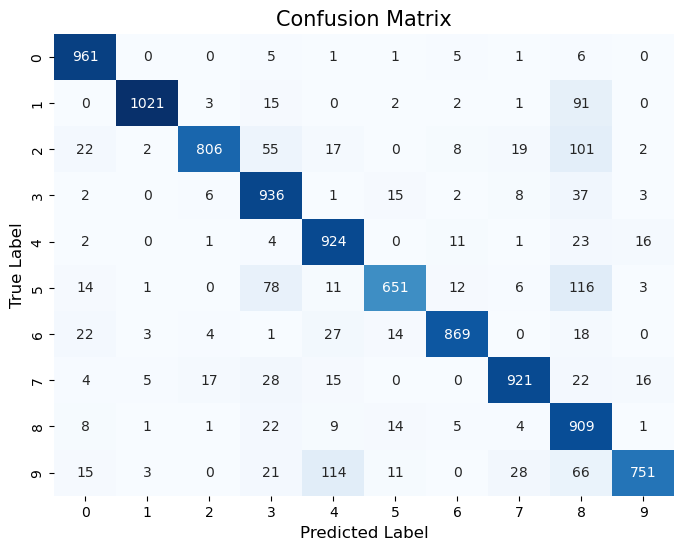

In [ ]:
datapath = os.path.join(project_root, 'data/mnist_data.npz')
X_train, y_train, X_test, y_test = load_dataset(datapath)

def train_val_split(X: np.ndarray, y: np.ndarray, val_size: float = 0.1, random_seed: int = 42):
    np.random.seed(random_seed)
    N = X.shape[0]
    indices = np.random.permutation(N)
    val_count = int(N * val_size)
    val_indices = indices[:val_count]
    train_indices = indices[val_count:]
    return X[train_indices], X[val_indices], y[train_indices], y[val_indices]

X_train, X_val, y_train, y_val = train_val_split(X_train, y_train, val_size=0.1, random_seed=42)

model = SoftmaxRegression(num_features=28 * 28, num_classes=10)

model.fit(X_train.reshape(X_train.shape[0], -1), y_train, X_val=X_val.reshape(X_val.shape[0], -1), y_val=y_val, learning_rate=0.1, epochs=10, verbose=True, batch_size=256)

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

print(f"Accuracy: {accuracy(y_pred, y_test)}")

plt.figure(figsize=(6,6))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'label: {y_test[i]}, prediction: {y_pred[i]}', fontsize=8)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, num_classes=10)

plot_confusion_matrix(cm, range(10))

0


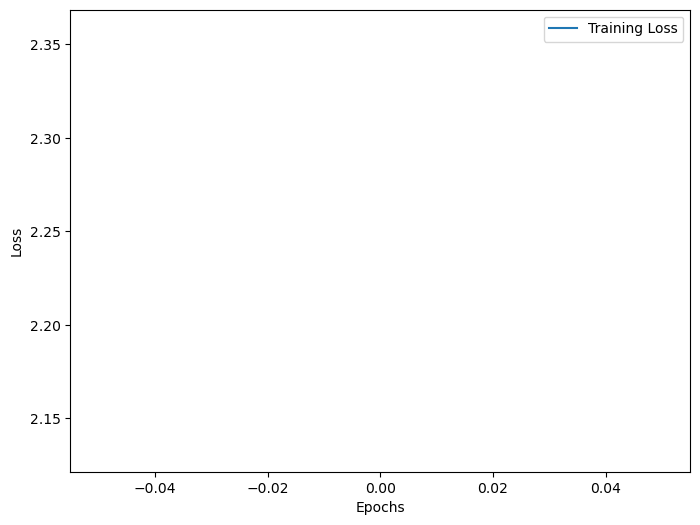

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

print(len(model.acc_history))

# show the loss history
plt.plot(model.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()